In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [215]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [216]:
data_attack = pd.read_csv('/content/drive/MyDrive/Dataset/attack.csv', nrows = 100000)

In [217]:
data_normal = pd.read_csv('/content/drive/MyDrive/Dataset/normal.csv', nrows = 100000)

In [218]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [219]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [220]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [221]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [222]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [223]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1


In [224]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [225]:

X.shape

(200000, 25)

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:200000], test_size = 0.2)

In [227]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2', return_sequences=True)))
    # model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    # model.add(LSTM(64, activation='tanh', kernel_regularizer='l2', return_sequences=True))
    # model.add(LSTM(64, activation='tanh', kernel_regularizer='l2', return_sequences=True))
    # model.add(LSTM(64, activation='tanh', kernel_regularizer='l2'))
    

    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [228]:
model = create_baseline()

In [229]:
print(Y_train.dtype)

object


In [230]:
Y_train[0:10]

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=object)

In [231]:
X_train[0:10]

array([[[ 1.36957576,  0.04669418,  1.36913597, ..., -0.14432615,
         -0.3535887 , -0.07655916],
        [ 1.36957576,  0.04669418,  1.36913597, ..., -0.14432615,
         -0.3535887 , -0.07670879],
        [-0.30556023,  0.04669418, -0.30234292, ..., -0.14432615,
         -0.3535887 , -0.07670631],
        ...,
        [ 1.36957576,  0.04669418,  1.36913597, ..., -0.14432615,
         -0.3535887 , -0.07669024],
        [ 1.36957576,  0.04669418,  1.36913597, ..., -0.14432615,
         -0.3535887 , -0.07657812],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 1.36957576,  0.04669418,  1.36913597, ..., -0.14432615,
         -0.3535887 , -0.07673331],
        [ 1.36957576,  0.04669418,  1.36913597, ..., -0.14432615,
         -0.3535887 , -0.07653484],
        [ 1.36957576,  0.04669418,  1.36913597, ..., -0.14432615,
         -0.3535887 , -0.07673331],
        ...,
        [ 0.40362143,  0.04669418,  0.40529048, ..., -

In [232]:
Y_train = np.asarray(Y_train).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

In [233]:
history = model.fit(X_train, Y_train, epochs = 40,validation_split=0.2, verbose = 1)

Epoch 1/40
4000/4000 [==============================] - 112s 27ms/step - loss: 0.4712 - accuracy: 0.8912 - val_loss: 0.2311 - val_accuracy: 0.9317
Epoch 2/40
4000/4000 [==============================] - 104s 26ms/step - loss: 0.2248 - accuracy: 0.9363 - val_loss: 0.1999 - val_accuracy: 0.9425
Epoch 3/40
4000/4000 [==============================] - 104s 26ms/step - loss: 0.2124 - accuracy: 0.9403 - val_loss: 0.1976 - val_accuracy: 0.9465
Epoch 4/40
4000/4000 [==============================] - 105s 26ms/step - loss: 0.1992 - accuracy: 0.9443 - val_loss: 0.1982 - val_accuracy: 0.9456
Epoch 5/40
4000/4000 [==============================] - 105s 26ms/step - loss: 0.1936 - accuracy: 0.9455 - val_loss: 0.1825 - val_accuracy: 0.9480
Epoch 6/40
4000/4000 [==============================] - 107s 27ms/step - loss: 0.1909 - accuracy: 0.9462 - val_loss: 0.2080 - val_accuracy: 0.9394
Epoch 7/40
4000/4000 [==============================] - 107s 27ms/step - loss: 0.1857 - accuracy: 0.9476 - val_loss: 0

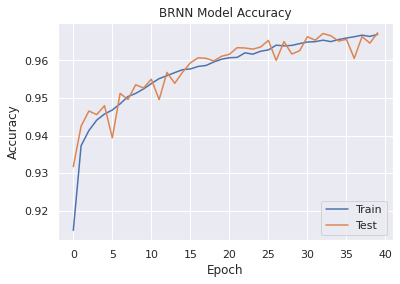

In [234]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()

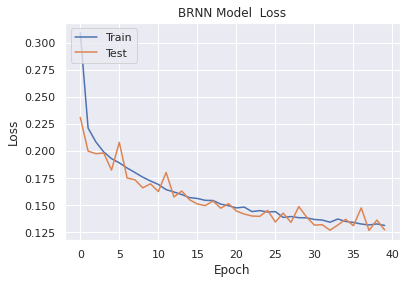

In [235]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()

In [236]:
predict = model.predict(X_test, verbose=1)

1250/1250 [==============================] - 10s 7ms/step


In [237]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1


In [240]:
# to_heat_map =[[tn,fp],[fn,tp]]
# to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
# ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [239]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.60%
